# Anomaly Detection: Continious Variable Probabilistic Methods for Identifying Outliers

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from pydataset import data

import matplotlib.pyplot as plt
%matplotlib inline

<hr style="border:2px solid gray">

In [37]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"    

In [38]:
df = pd.read_csv(url)

In [39]:
df.sample(3)

,id,dataset,x,y
22,22,III,10.0,7.46
1,1,I,8.0,6.95
39,39,IV,8.0,5.25


In [40]:
df.groupby('dataset').describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [41]:
mycols = list(itertools.product(['x','y'], ['50%', 'mean', 'max','std']))

In [42]:
df.groupby("dataset").describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

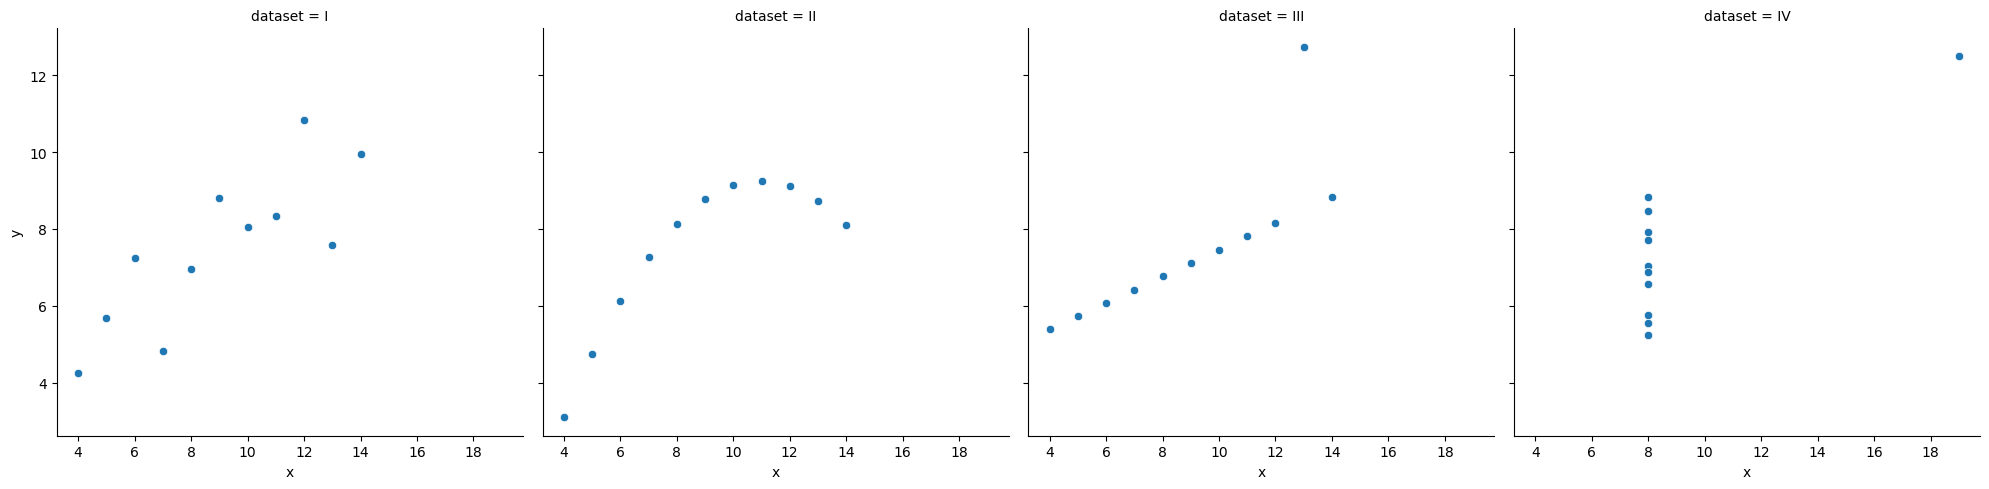

In [43]:
sns.relplot(x='x', y='y',col='dataset', data=df)

<b> Why do we visualize our data?</b>:
- Look at distribution and spread:
    - boxplots (univariate)
    - histograms (univariate): gap in information means there is likely an outlier
    - scatter plots
* These can show us outliers

<br>

- Descriptive statistics do not tell the whole story
    - all the same stats for each feature (mean, median, max, min, etc)
    - but the data is all different
    - this is why we must visualize

<b>Ascombe's Quartet</b>: specific instance that is indicative of the fact that descriptive stats do not tell the enture picture
- 4 different datasets in this dataframe
- The measures of central tendancy as well as min/max don't identify the shape our any outliers
- The linear model for each quartet dataset has almost the exact same slope and intercept
- The visualization makes the general trends of the data, as well as the presence of outliers, crystal clear

<b> Let's take a look at this again</b>

In [2]:
#call the url we are wanting to use
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

#read in that csv using pandas
df = pd.read_csv(url)

In [3]:
#take a look at the data
df.sample(3)

,id,dataset,x,y
25,25,III,9.0,7.11
22,22,III,10.0,7.46
1,1,I,8.0,6.95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       44 non-null     int64  
 1   dataset  44 non-null     object 
 2   x        44 non-null     float64
 3   y        44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44.0,21.500000,12.845233,0.0,10.7500,21.50,32.2500,43.00
x,44.0,9.000000,3.198837,4.0,7.0000,8.00,11.0000,19.00
y,44.0,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


<b>Note:</b>
- We can see that there are layers to this dataframe.
- Let's consider grouping by dataset (since there are 4 separate datasets)

In [6]:
#get the stats broken into datasets
df.groupby("dataset").describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [7]:
#let's break this down a bit further using itertools
#essentially, I want to see the median and mean of x and y only
mycols = list(itertools.product(['x','y'], ['50%', 'mean', 'max', 'std']))

In [8]:
df.groupby("dataset").describe()[mycols]

x                          y                           
         50% mean   max       std   50%      mean    max       std
dataset                                                           
I        9.0  9.0  14.0  3.316625  7.58  7.500909  10.84  2.031568
II       9.0  9.0  14.0  3.316625  8.14  7.500909   9.26  2.031657
III      9.0  9.0  14.0  3.316625  7.11  7.500000  12.74  2.030424
IV       8.0  9.0  19.0  3.316625  7.04  7.500909  12.50  2.030579

<b>Statistically, it seems like those 4 datasets are the same or very similar. </b>
<br>

For X:

- Mean datasets I, II, III and IV are all the same
- Median of datasets I, II, and III are the same
- All datasets have the same std
- Datasets I, II, and III same max value
<br>

<b>but</b> there is more to the story if you visualize it!

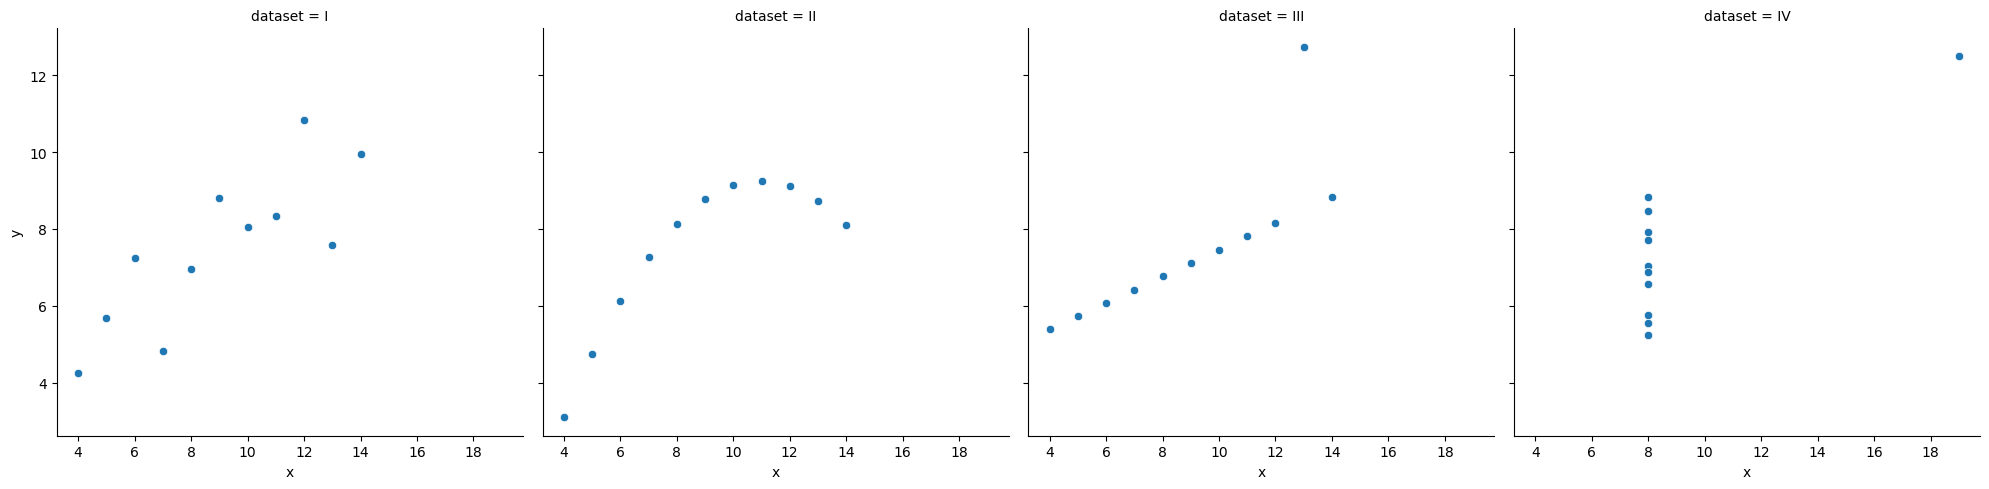

In [9]:
sns.relplot(x='x', y='y', col='dataset', data=df)

<b>Once we visualize, we can see that the datasets are actually very different. Proving that visuals and stats should be used together to tell the entire story.

<hr style="border:1px solid black">

## Empirical Rule 

<i>aka: Three Sigma Rule and 68-95-99.7 Rule</i>

As is the case with most normal distribution (bell curves) the majority of the data falls in the middle of the curve. There are then tails to the bell curve that contain the remainder of the information. 

<b>This rule assumes that:</b>

   - normal distribution has some qualities to find outliers
   - Standard bell curve, to assess normality

<b>The rule asserts that:</b>

   - 68% of the data falls within 1 standard deviation
   - 95% of the data falls within 2 standard deviations
   - 99.7% of the data falls within 3 standard deviations

![](empirical_rule.png)

<b>Additionally</b>:

   - The rule is often used as a quick test of normality
   - Is often erroneously applied to non-normally distributed data
   - Can be an oversimplified approach

<b>Common Mistakes Made:</b>

   - This rule drops everything outside of 2 standard deviations which highlights the danges of approaching outlier detection in this way.

Just as we would want to use descriptive stats <b>and</b> visualizations together to get the whole picture, we would likely want to use different algorithms to flag outliers. 

<hr style="border:1px solid black">

## Using Z-Score for identifying outliers

<b>Remember:</b>

- ```np.random.normal``` generates numbers from a normal distribution with a specified mean and standard deviation

- ```z-score```: a relationship between how far a point is away from the mean in a association with standard deviation as its denominator. It is a way to standardize data and compare a data point to the mean of the sample.
    - Z = (value of sample - mean of sample)/ standard deviations of sample


In [10]:
#create an array of random numbers with normal distribution 
x = np.random.normal(50, 40, size=1000)
x

array([-2.57461620e+01,  9.03689159e+01,  2.65758781e+01,  5.56696321e+01,
        7.00415813e+01, -1.69012812e+00,  5.09586404e+01,  6.71495627e+01,
        4.88827799e+01,  6.90221840e+01,  9.20736900e+01, -1.56601054e+01,
        5.65026462e+01, -3.28718023e+01,  4.76955799e+01,  8.54564090e+01,
        5.83809048e+01,  4.31047039e+01,  2.46360829e+01,  9.76026504e+01,
        1.02939584e+02,  4.30152831e+01,  6.65200808e+01, -7.36661545e+01,
        7.88902218e+01,  3.11058583e+01,  8.77009329e+01,  5.82064881e+01,
        1.48194272e+01,  8.31990653e+00,  8.48932745e+00,  7.03391035e+01,
        4.08236800e+01,  9.23531349e+01,  1.46286389e+01,  2.43286247e+01,
        5.13564834e+01,  7.51361042e+01, -7.02931454e+00,  6.83103349e+01,
       -6.09640229e+00,  1.15117992e+02,  5.63217846e+01,  6.54613769e+01,
        7.01573592e+01,  4.20311241e+01,  4.14189771e+01,  7.86584600e+01,
        6.06118432e+01,  9.00713671e+01,  6.24149325e+01,  1.06680625e+02,
        8.06286879e+00,  

In [11]:
# Calculate the z-score for each item in the array
zscores = pd.Series((x - x.mean()) / x.std())
#take a look
zscores

0     -1.849898
1      1.008896
2     -0.561711
3      0.154587
4      0.508430
         ...   
995   -0.546622
996    0.233488
997    0.330319
998   -1.718071
999    1.788969
Length: 1000, dtype: float64

In [12]:
# Finds all of the observations with two standard deviations or more.
x[zscores.abs() >= 2]

array([-32.87180234, -73.66615448, 138.20815593, -38.2489094 ,
       -53.72246062, 148.67236542, -39.62194904, 132.50163891,
       162.27249667, 158.74562973, 144.72466782, -39.35808859,
       -54.86177684, 132.40911152, -81.51068501, 139.57946032,
       -38.15558626, 144.48621174, 147.8865612 , -59.33959421,
       -68.58617377, 133.77922936, 175.89891695, -35.0902825 ,
       159.90764049, -38.6085466 , 132.65657044, 142.36274454,
       182.51016972, 135.11704138, -47.94283539, -32.75236497,
       -46.01939437, -39.9183877 , -81.09460644, 141.45418524])

In [13]:
#how many observations is this 
len(x[zscores.abs() >= 2])

36

In [14]:
# Finds all of the observations with three standard deviations or more
x[zscores.abs() >= 3]

array([-73.66615448, -81.51068501, 175.89891695, 182.51016972,
       -81.09460644])

<b>Note:</b>

- As we can see above we went from 43 observations that were 2 standard deviations of more away to <b>one</b> observation

<hr style="border:1px solid black">

## "Black Swan"

Where did the name come from?
- Europeans originally thought that swans were only white. So as far as they knew, black swans did not exist. That is, until they traveled to colonize Australia... Thus "black swam" became the term to define someone super unlikely.

This refers to :
- very strong anomaly- in the field of novalty
- extremely low frequency events that have an exponentially powerful impact
- far outside the typical probabilty
- very far end of the tail of distribution (bell curve)

Black Swan Example:
- 1987 stock exchange crash
- Dow Jones fell 508 points in a single day
- This accounted for 23% of value of Dow Jones
- This event was found to be <b><u>25</b></u> standard deviations away from the mean.

<i>Just because something is exceptionally improbable, doesn't mean it <b>can't</b> happen. If a black swan event does occur, it has the potential to change all of your data from that point on.


<hr style="border:1px solid black">

# Code it out
Let's bring back the ```swiss``` dataset!

In [15]:
#import from pydataset
swiss = data('swiss')

In [16]:
#take a look
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [17]:
#descriptive stats
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


<b>Visualize</b>

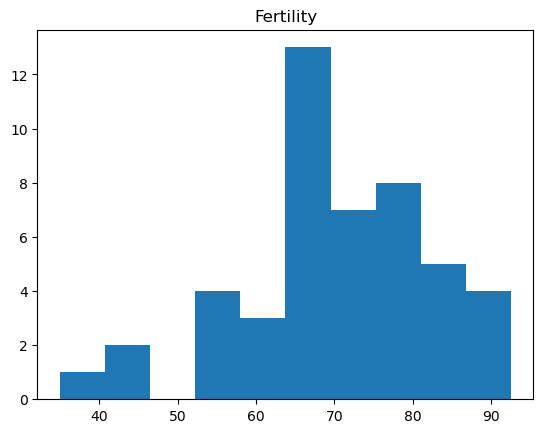

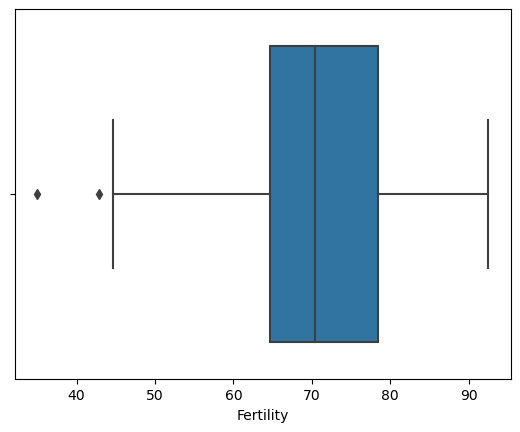

------------


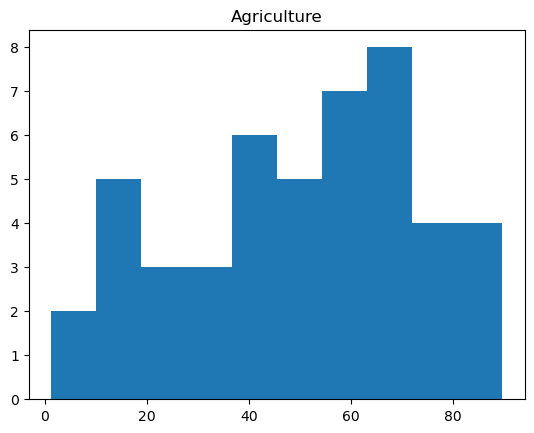

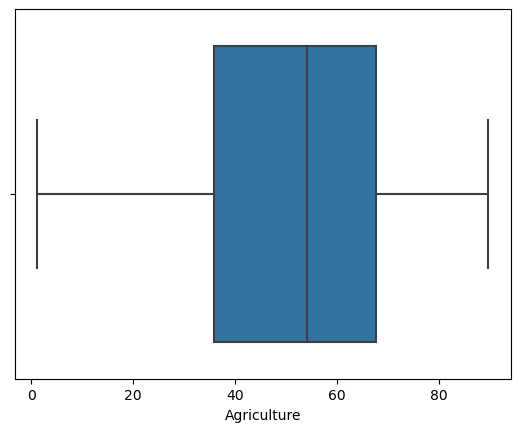

------------


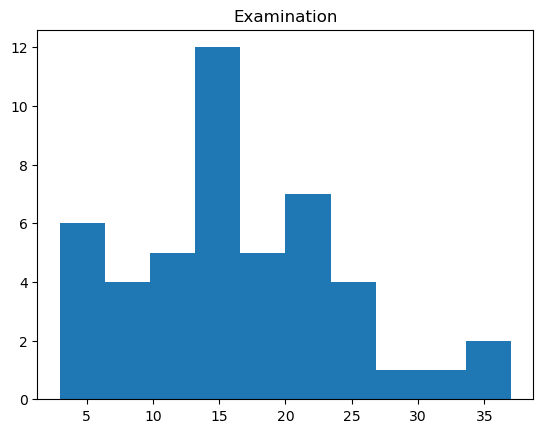

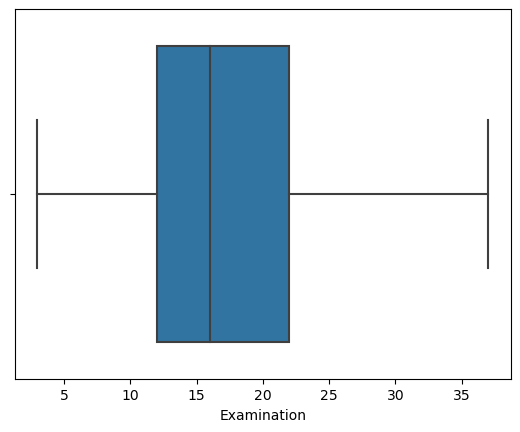

------------


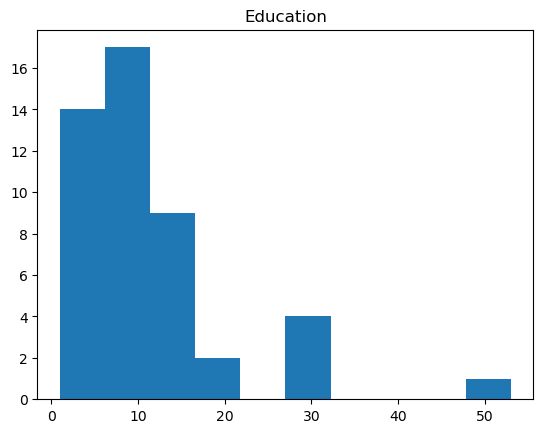

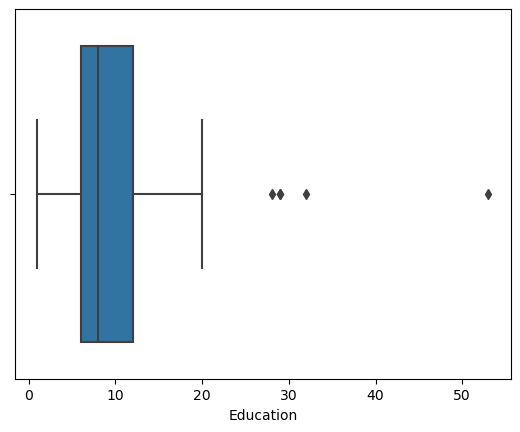

------------


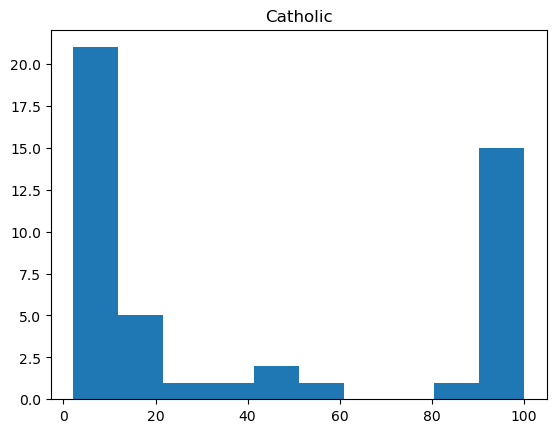

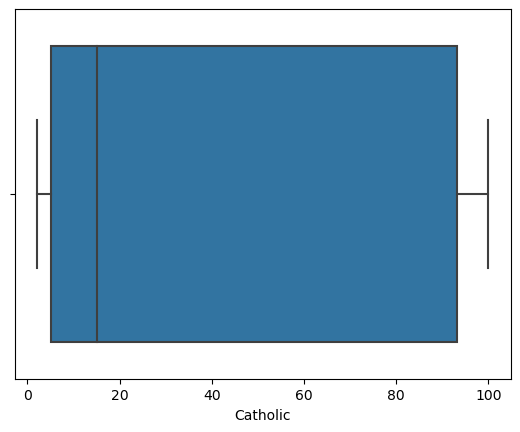

------------


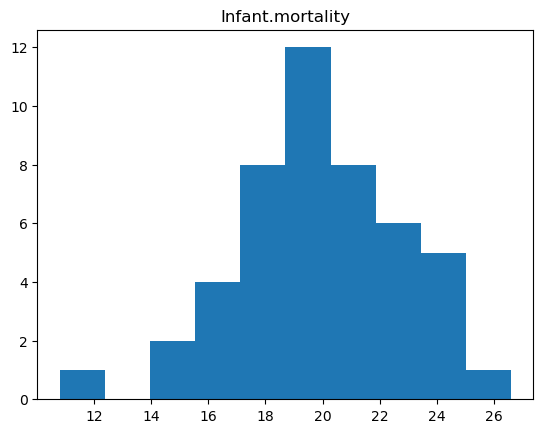

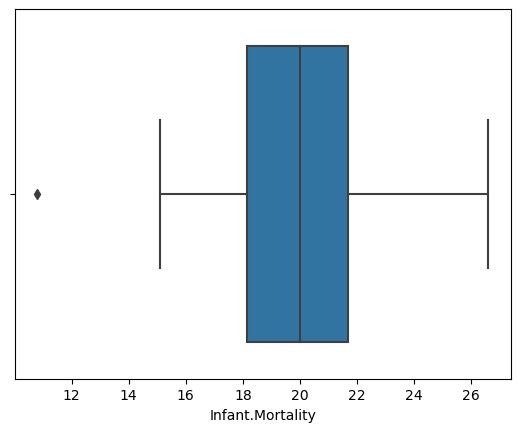

------------


In [18]:
cols = swiss.columns.to_list()    

for col in cols:
    plt.hist(swiss[col])
    plt.title(col.replace('_',' ').capitalize())
    plt.show()
    sns.boxplot(data=swiss, x=col)
    plt.show()
    print('------------')

<b>Takeaways</b>:
- ```Fertility```: There appear to be some outliers here with the break in the histogram and the box plot 
- ```Agriculture```: no evident outliers
- ```Examination```: no evident outliers
- ```Education```: appears to have several outliers
- ```Catholic```: In the histogram there appears to be an outlier, but the boxplot doesn't show it
- ```Infant.Mortality```: there does appear to be an outlier

<hr style="border:1px solid black">
<hr style="border:1px solid black">

<hr style="border:1px solid black">

## IQR

Visualizing:
- box and whisker plot will tell you the fences, mean, and outliers (dots)

Calculating Fences:
- lower fence: Q1 - multiplier * IQR
- upper fence: Q3 + multiplier * IQR
    
Determining Multiplier:
- This is how far a point has to be to be considered and outlier
- 1.5 is typical inner fence
- 3 is for more extreme outliers (outer fence)

In [19]:
#get the 1st quantile of examination column
swiss.Examination.quantile(0.25)

12.0

<b>Note</b>:
- When the multiplier is set to 1.5, this is an inner fence.
- When the multiplier is set to 3, this is an outer fence.

In [20]:
#start with an inner fence calculation
multiplier =1.5

#calculate our q1 and q3
q1 = swiss.Examination.quantile(0.25)
q3 = swiss.Examination.quantile(0.75)
iqr = q3-q1

In [21]:
q1, q3, iqr

(12.0, 22.0, 10.0)

In [22]:
#because we are using 1.5 as our multiplier- this will be an inner fence
inner_lower_fence = q1 - (multiplier * iqr) 
inner_upper_fence = q3 + (multiplier * iqr) 

In [23]:
#check out the dataframe where examination is under our fences (lower OR upper)
#using pipe for boolean operator "OR"
swiss[(swiss['Examination'] < inner_lower_fence) | (swiss['Examination'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


<AxesSubplot:xlabel='Examination'>

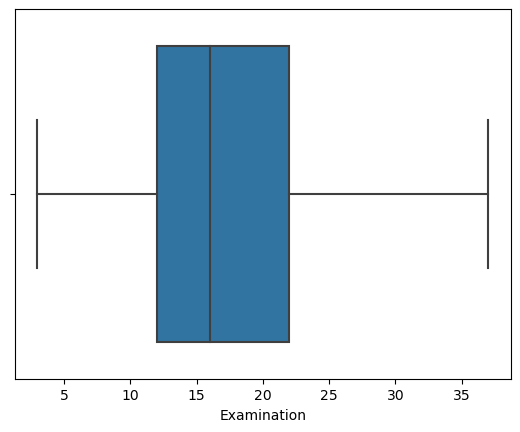

In [24]:
sns.boxplot(data=swiss, x='Examination')

<b>Takeaways</b>:
- The IQR confirms what the boxplot already showed us. Examination has no values outside of its fences. Therefore, it has no outliers.

<hr style="border:1px solid black">
<hr style="border:1px solid black">

## Using Z-score

<b>Exponential Tails of the Normal Distribution

![](tails_of_normal_distrib.png)

If an event that is +/- 6 standard deviations from the mean is supposed to occure every 1.4 millions years... the stock crash of 1987 is so highly unlikely that it shouldn't have happened in all of lifetimes combined <b>but</b> it is possible!

<b>Calculation for Z-Score</b>:
z = (x-x_mean)/x_std

###  ```Infant.Mortality```

In [25]:
#assign a new column to the zscores for infant mortality
swiss['infant_mortality_zscores'] = (swiss['Infant.Mortality'] - swiss['Infant.Mortality'].mean()) / swiss['Infant.Mortality'].std()

In [26]:
#look at z-scores for all of the datapoints within the dataframe
swiss['infant_mortality_zscores']

Courtelary      0.775037
Delemont        0.775037
Franches-Mnt    0.088388
Moutier         0.122720
Neuveville      0.225718
Porrentruy      2.285664
Broye           1.255691
Glane           1.702013
Gruyere         0.363047
Sarine          1.530350
Veveyse         1.564683
Aigle          -1.181913
Aubonne        -0.289269
Avenches        0.946699
Cossonay       -0.426599
Echallens       0.431712
Grandson        0.019723
Lausanne        0.088388
La Vallee      -3.138862
Lavaux          0.019723
Morges         -0.666926
Moudon          0.843702
Nyone          -1.113248
Orbe           -1.593902
Oron            0.363047
Payerne         1.324356
Paysd'enhaut   -0.666926
Rolle          -1.250578
Vevey           0.328715
Yverdon         0.878034
Conthey        -1.662567
Entremont      -0.048942
Herens         -0.563929
Martigwy       -0.186272
Monthey         0.088388
St Maurice     -0.735591
Sierre         -1.250578
Sion           -0.632594
Boudry          0.122720
La Chauxdfnd    0.191385


In [27]:
#Let's look to see if anything falls outside of 3 standard deviations
#If it does, this could be an anomaly
swiss[swiss['infant_mortality_zscores'].abs() >= 3]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


<AxesSubplot:xlabel='Infant.Mortality'>

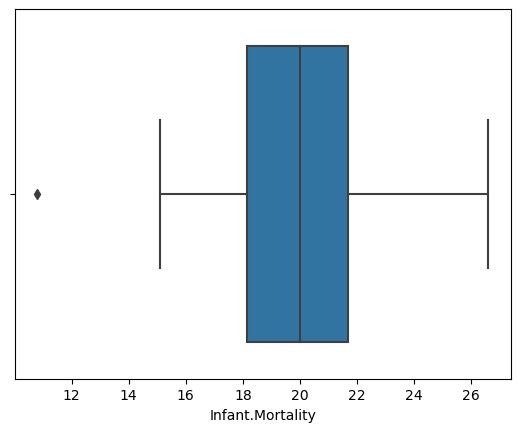

In [28]:
sns.boxplot(data=swiss, x='Infant.Mortality')

<b>Takeaways</b>:
- The z-scores (stats) and boxplot (visuals) together tell us that ```Infant.Mortality``` could have an anomaly.
<br>

- This should bring us to ask questions...
<br>

- What is going on in La Vallee?
- Why do they have an exceptionally low infant mortality?
- Was this data entered incorrectly (human error) or is it actually an anomaly?

<hr style="border:1px solid black">

### ```Examination```

In [29]:
#assign a new column to the zscores for Examination
swiss['examination_zscores'] = (swiss['Examination'] - swiss['Examination'].mean()) / swiss['Examination'].std()

In [30]:
swiss['examination_zscores']

Courtelary     -0.186686
Delemont       -1.314805
Franches-Mnt   -1.440152
Moutier        -0.562726
Neuveville      0.064007
Porrentruy     -0.938766
Broye          -0.061340
Glane          -0.312033
Gruyere        -0.562726
Sarine         -0.061340
Veveyse        -0.312033
Aigle           0.565393
Aubonne        -0.312033
Avenches        0.314700
Cossonay        0.690739
Echallens       0.189353
Grandson        0.064007
Lausanne        1.192126
La Vallee       1.818858
Lavaux          0.314700
Morges          0.690739
Moudon         -0.312033
Nyone           0.690739
Orbe            0.440046
Oron           -0.562726
Payerne        -0.312033
Paysd'enhaut   -1.314805
Rolle          -0.061340
Vevey           1.066779
Yverdon        -0.186686
Conthey        -1.690845
Entremont      -1.189459
Herens         -1.440152
Martigwy       -0.562726
Monthey        -1.189459
St Maurice     -0.938766
Sierre         -1.690845
Sion           -0.437379
Boudry          1.192126
La Chauxdfnd    1.568165


In [31]:
#Let's look to see if anything falls outside of 2 standard deviations
#If it does, this could be an anomaly
swiss[swiss['examination_zscores'].abs() >= 2]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores
Neuchatel,64.4,17.6,35,32,16.92,23.0,1.049696,2.320244
V. De Geneve,35.0,1.2,37,53,42.34,18.0,-0.666926,2.570937


In [32]:
#IQR
inner_multiplier = 1.5
q1 = swiss['Infant.Mortality'].quantile(0.25)
q3= swiss['Infant.Mortality'].quantile(0.75)
iqr= q3- q1

In [33]:
inner_lower_fence = q1 - (inner_multiplier * iqr)
inner_upper_fence = q3 + (inner_multiplier * iqr)

In [34]:
swiss[(swiss['Infant.Mortality'] < inner_lower_fence) | (swiss['Infant.Mortality'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores,examination_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862,1.818858


<b>Note</b>:
- 2 standard deviations contains 95% of the data
- We might want to investigate ```examination``` further